In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from  matplotlib import rcParams
from matplotlib.cm import rainbow 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
cwd = os.getcwd()+"\dataset.csv"



# using KNeighborsClassifier


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv(cwd)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### if scuccessfully read the file and pre process it  

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# feture selction first step using heatmap
# alterntaively u can use
#### Filter methods
#### Wrapper Methods
#### Embedded Methods
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

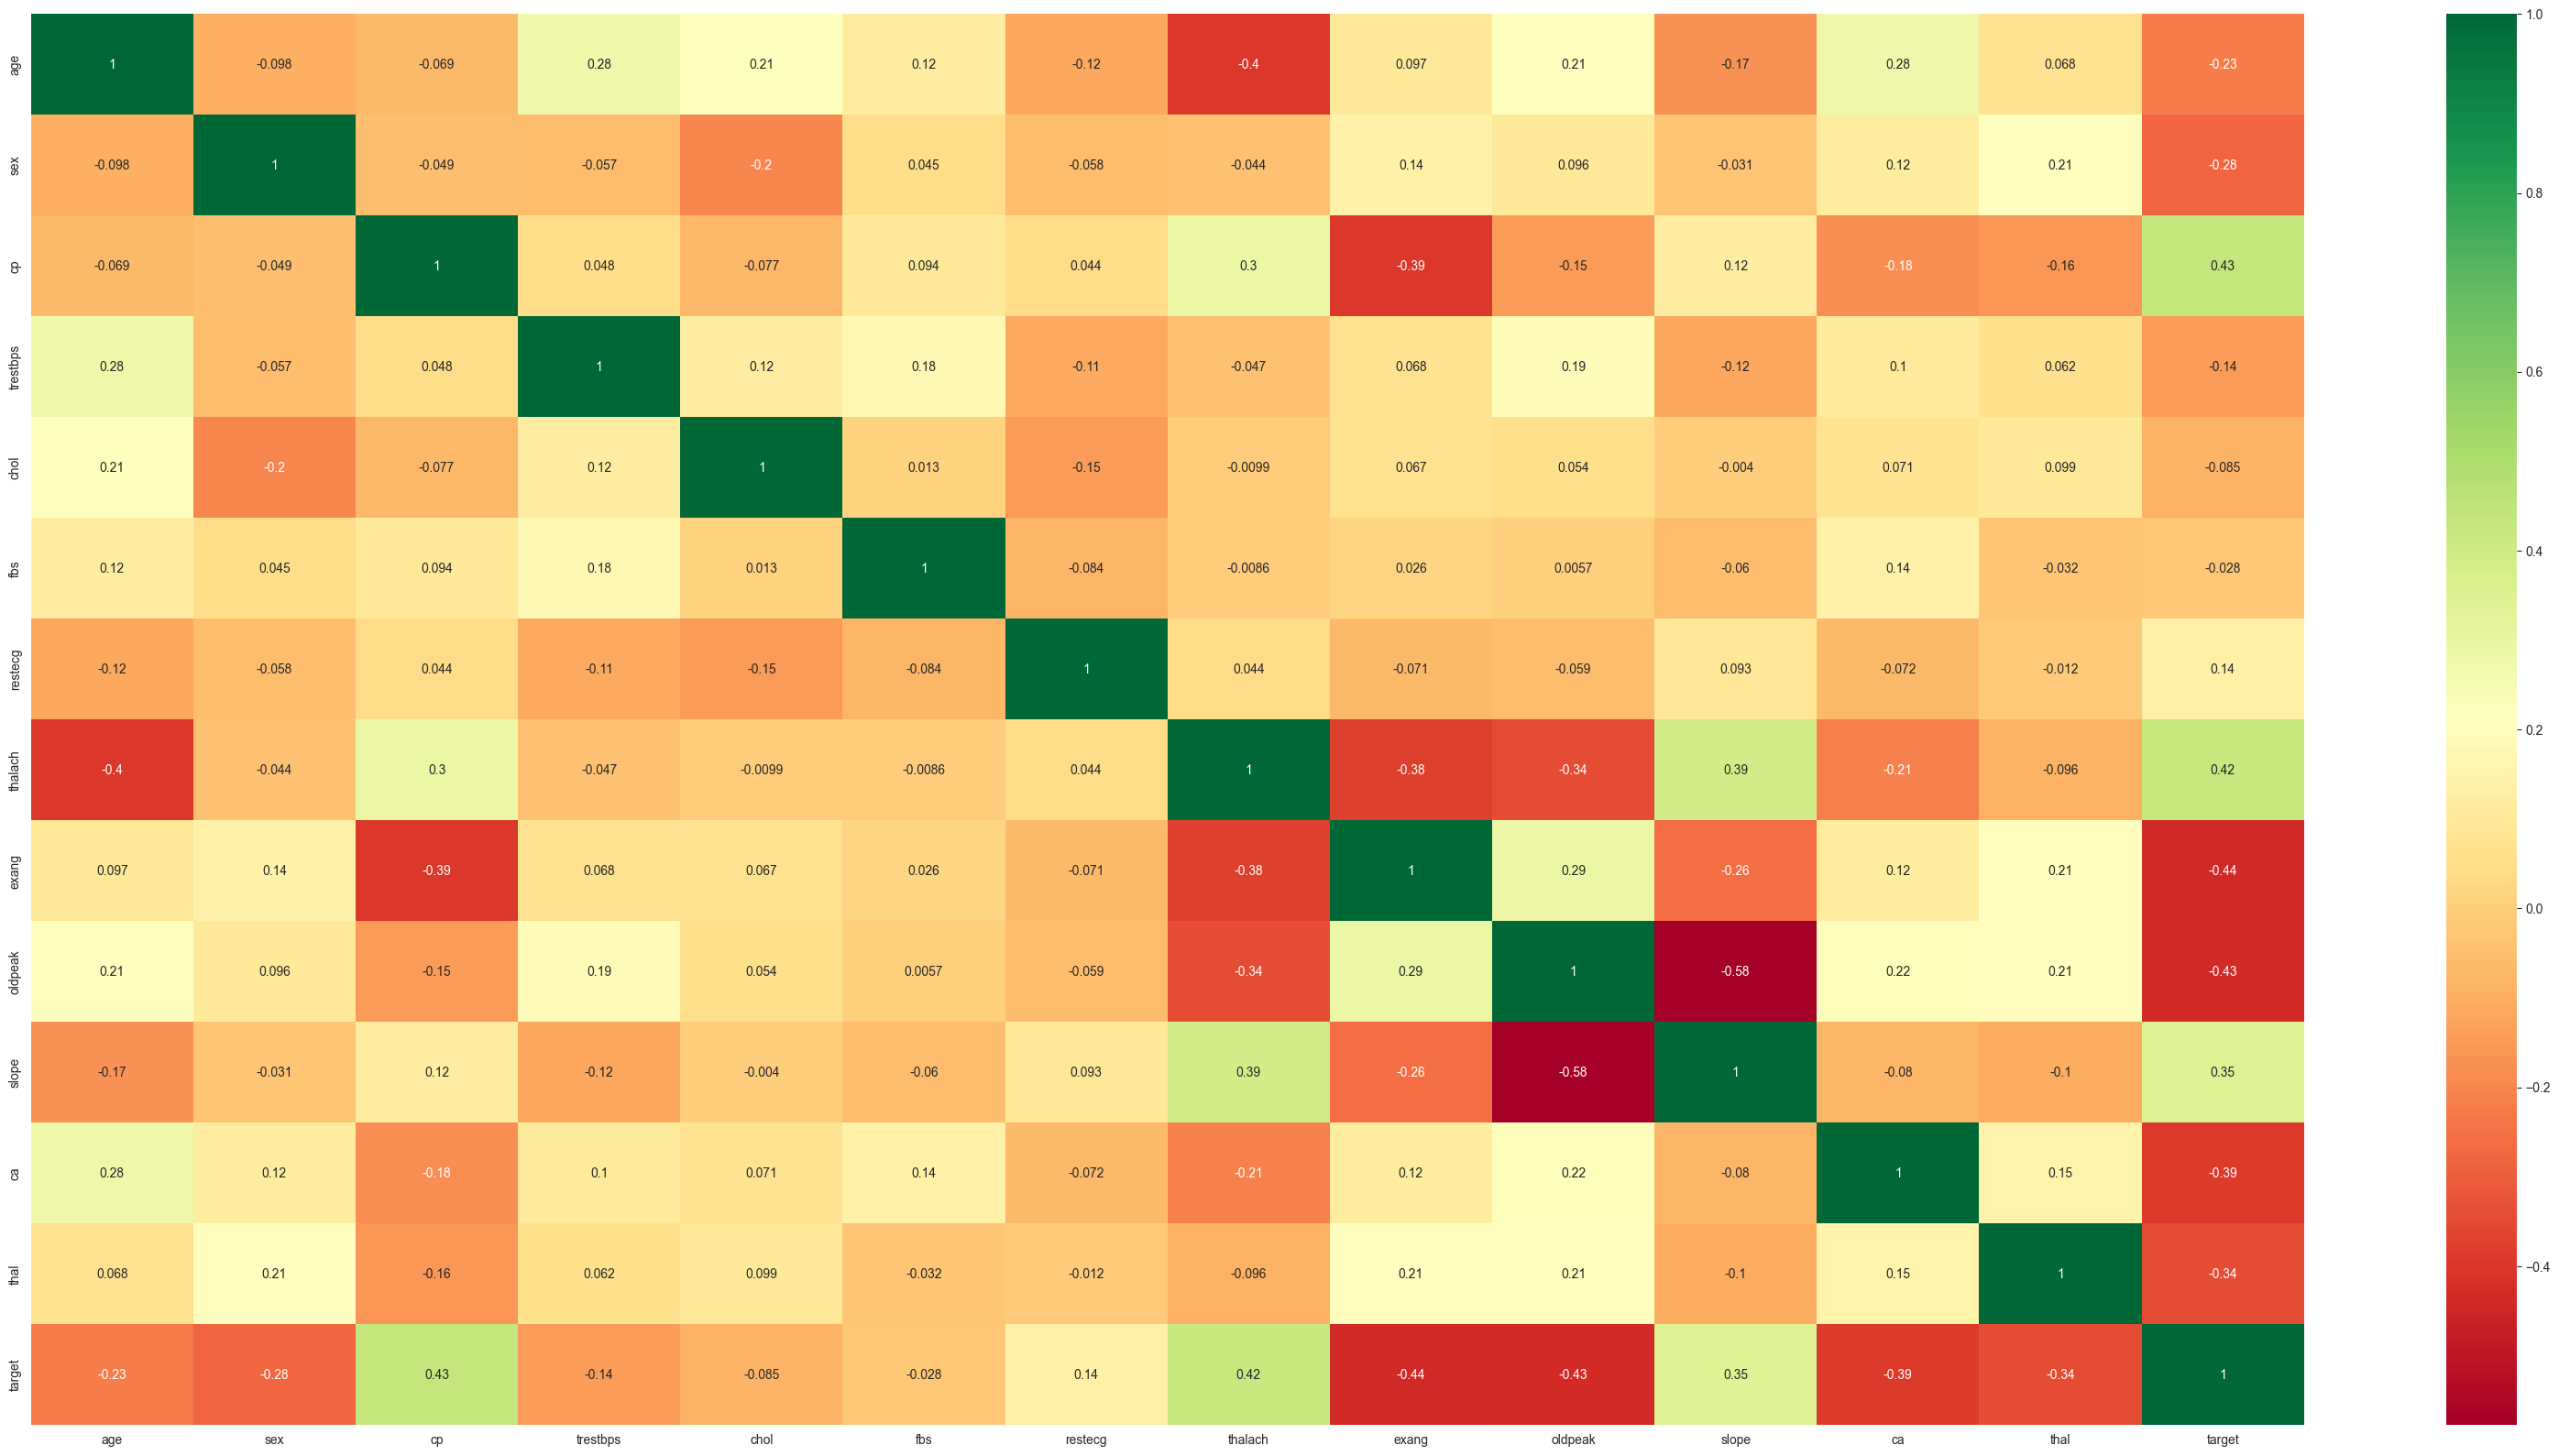

In [76]:
import seaborn as sb
correlation = df.corr()
# print(correlation) visualizing this data

top_correlated_Feuture = correlation.index
# print(top_correlated_Feuture)

plt.figure(figsize=(40,20))

fig = sb.heatmap(df[top_correlated_Feuture].corr(), annot=True, cmap="RdYlGn")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

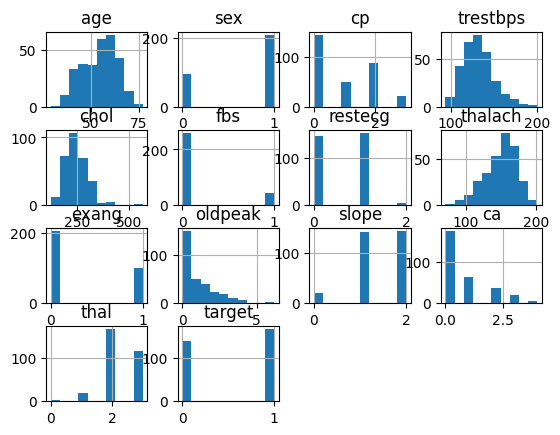

In [24]:
df.hist()

#### checking if the dataset is balanced or not

<AxesSubplot:xlabel='target', ylabel='count'>

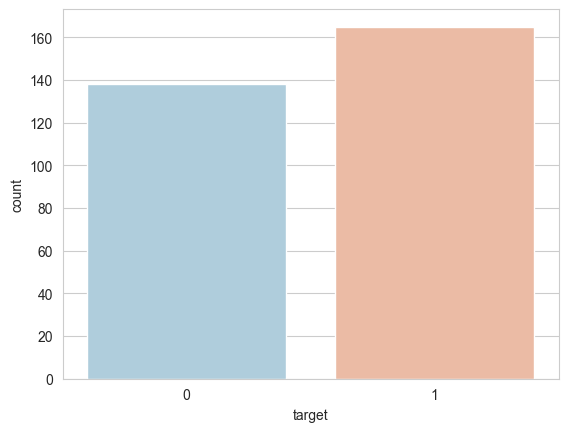

In [31]:
sb.set_style('whitegrid')
sb.countplot(x='target',data=df,palette='RdBu_r')

In [43]:
# there might be required to create dummies variables  to some of catagorical varaibles
# dummies variables requires
"""
    some useof  dummies variables 
    
For representing a Yes/No property
For representing a categorical value
For representing an ordered categorical value
For representing a seasonal period
For representing Fixed Effects
For representing Treatment Effects
In regression discontinuity designs
        ==> The last four use-cases, namely the use of dummies 
            to deseasonalize data, to represent fixed effects and
            treatment effects, and for modeling regression discontinuities 
            all deserve their own separate chapters.
"""
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# print(len(dataset))
# print(dataset.head(2))
# print("------------------------")
# print(df.head())


303
   age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0   63       145   233      150      2.3       1      0      1     0     0   
1   37       130   250      187      3.5       1      0      1     0     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  

[2 rows x 31 columns]
------------------------
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0

In [46]:
# since the data is measure in different measurment u need to do standarsclaeing
# that is based on what is defined inside the standard normal distribution on the data
# no need to do scaling on target varibale

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

coulumns_that_needs_to_be_scaled = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

dataset[coulumns_that_needs_to_be_scaled] = standardScaler.fit_transform(dataset[coulumns_that_needs_to_be_scaled])


In [47]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [48]:
y = dataset['target']
x= dataset.drop(['target'], axis=1)

Text(0.5, 1.0, 'k neighbours classifier scores for differenr k values')

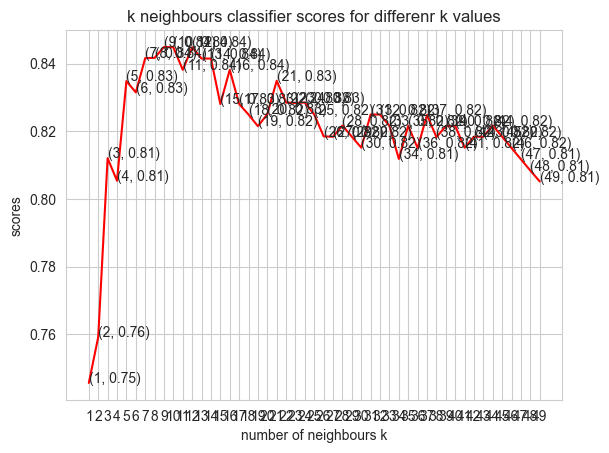

In [77]:
from sklearn.model_selection import cross_val_score
#  in orderd to find the best value for the k value in order to perform knebighbours

knn_score = []

for k in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, x, y ,cv=10)
    knn_score.append(score.mean())
    
    

plt.plot([k for k in range(1,50)], knn_score, color='red')
for i in range(1, 50):
    plt.text(i, knn_score[i-1],(i, round(knn_score[i-1],2)))
    
plt.xticks([i for i in range(1, 50)])
plt.xlabel('number of neighbours k')
plt.ylabel('scores')
plt.title('k neighbours classifier scores for differenr k values')

In [85]:
# so the value with highes peak is 12 afterwards it all going down

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, x, y ,cv=10)
score.mean()

0.8448387096774195

# USING DECISION TREE
this helps to solve regression problem
<!--  first teutorial code then applying to the current  problem -->

In [88]:
from sklearn.datasets import load_breast_cancer

In [95]:
df = load_breast_cancer()
dataset = pd.DataFrame(data = df['data'], columns =df['feature_names'])

In [97]:
dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
from sklearn.model_selection import train_test_split

x= dataset.copy()
y = df['target']


x_train, x_test, y_tain, y_test = train_test_Split(x,y, test_size = 0.33)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,